# Saliency Maps for Explainability with VGG16


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision
from torchvision import models, transforms
import cv2

In [2]:
# Load pretrained VGG16 model
model = models.vgg16(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/jexica/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [31:56<00:00, 289kB/s]     


In [3]:
# Define transformation to normalize input image data according to pre-trained model requirements
normalize = transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])

# Define inverse transformation to revert normalized image back to its original form for visualization
inv_normalize = transforms.Normalize(mean = [-0.485/0.229, -0.456/0.224, -0.406/0.255], std = [1/0.229, 1/0.224, 1/0.255])

# Define a sequence of transformations to prepare the input image for the pre-trained model
transform = transforms.Compose([transforms.Resize((224, 224)),  # Resize image to the dimensions expected by the pre-trained model
                                transforms.ToTensor(),          # Convert PIL image to tensor
                                normalize,                      # Normalize the image data
                              ])

In [4]:
def saliency(img, model):
    '''
        Compute the saliency map of an input image with respect to the model's prediction.

        Args:
        - img (PIL.Image): Input image.
        - model (torch.nn.Module): Pre-trained neural network model.

        Returns:
        - None: Display the original image and its corresponding saliency map.
    '''

    # Disable gradient calculation for model parameters since we're not training
    for param in model.parameters():
        param.requires_grad = False
    
    # Set model to evaluation mode
    model.eval()

    # Transform input PIL image to torch.Tensor and normalize
    input = transform(img)
    input.unsqueeze_(0)

    # Set requires_grad to True for input to compute gradients 
    input.requires_grad = True

    # Forward pass to calculate predictions
    preds = model(input)
    score, indices = torch.max(preds, 1)

    # Backward pass to get gradients of predicted class score w.r.t. input image
    score.backward()

    # Get max along channel axis
    slc, _ = torch.max(torch.abs(input.grad[0]), dim=0)
    
    # Normalize saliency map to [0, 1]
    slc = (slc - slc.min())/(slc.max()-slc.min())

    # Apply inverse transform on the input image
    with torch.no_grad():
        input_img = inv_normalize(input[0])

    # Plot the original image and its saliency map
    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(input_img.detach().numpy(), (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1, 2, 2)
    plt.imshow(slc.numpy(), cmap=plt.cm.magma)
    plt.xticks([])
    plt.yticks([])
    
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


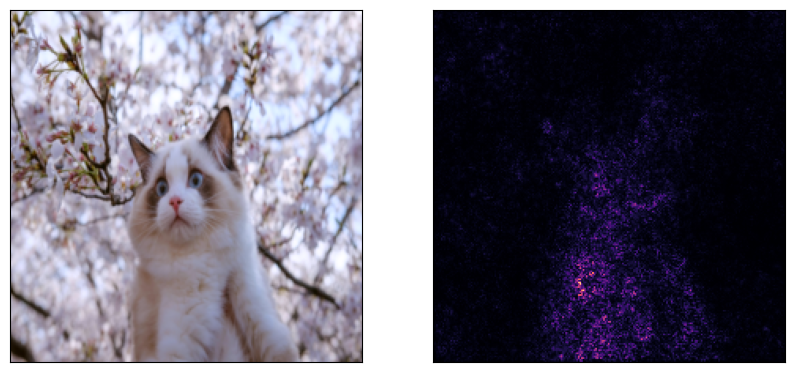

In [5]:
# Load the image
img = Image.open('data/Cat.jpeg').convert('RGB')

saliency(img, model)

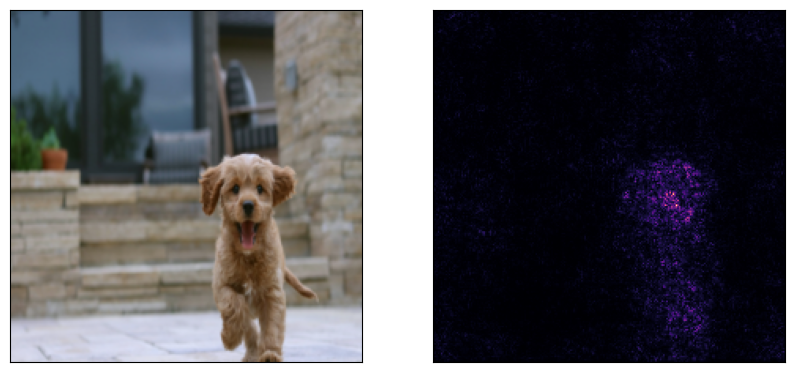

In [7]:
# Load the image
img = Image.open('data/Dog.jpeg').convert('RGB')

saliency(img, model)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


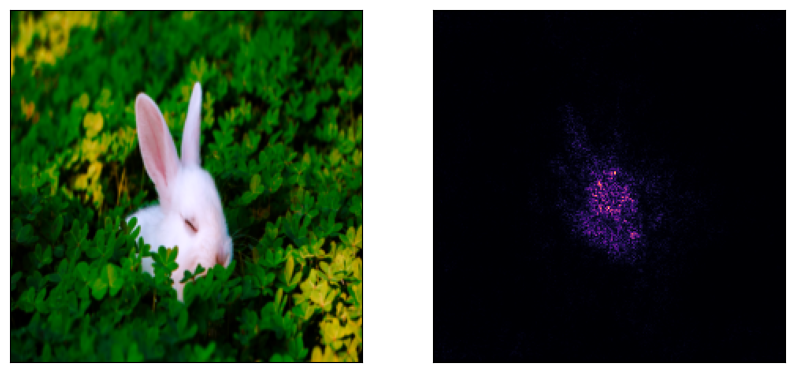

In [9]:
# Load the image
img = Image.open('data/Rabbit.jpeg').convert('RGB')

saliency(img, model)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


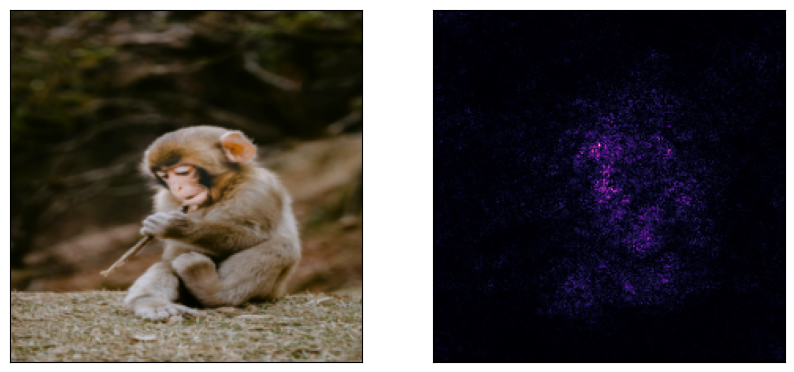

In [10]:
# Load the image
img = Image.open('data/Monkey.jpeg').convert('RGB')

saliency(img, model)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


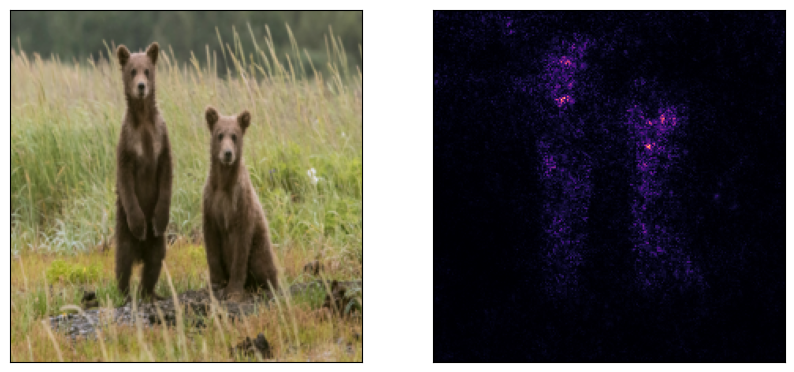

In [11]:
# Load the image
img = Image.open('data/Bear.jpg').convert('RGB')

saliency(img, model)

**CONCLUSION**: The generation of saliency maps for the provided images has proven to be a valuable technique for identifying regions of interest and understanding visual attention. 